*Adapted from https://github.com/nature-of-code/noc-examples-p5.js/tree/master/chp10_nn/NOC_10_01_Perceptron*

## Install and Import Dependencies

In [1]:
!pip install numpy
!pip install matplotlib

In [88]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import numpy as np

# %matplotlib notebook
%matplotlib widget

## Perceptron Class

In [89]:
# y = mx + c

class Perceptron:
    def __init__(self, n, lr, activation=None):
        self.weights = np.random.uniform(0, 1, n)
        self.lr = lr
        self.activation = activation
        
    def train(self, inputs, desired):
        # Make a guess
        guess = self.feed_forward(inputs)
        # Compute the factor for changing the weight based on the error
        # Error = desired output - guessed/actual output
        error = desired - guess
        # Adjust weights based on learning rate * error * input
        self.weights = [weight + (self.lr * error * inputs[i]) for i, weight in enumerate(self.weights)]
    
    def feed_forward(self, inputs):
        # Sum all input values
        # y = mx + x ..., y = m1x1 + m2x2 + c ... <- total gives the y
        
        total = sum([weight * inputs[i] for i, weight in enumerate(self.weights)])
        
        if self.activation == None:
            return total
        else:
            return self.activate(total)
        
    def evaluate(self, inputs, desired):
        guess = self.feed_forward(inputs)
        return desired - guess
    
    def activate(self, total):
        # Step function, outputs -1 or 1
        if total > 0:
            return 1
        else:
            return -1
        
        # Sigmoid function, outputs 0-1
        # return 1/(1 + math.pow(math.e, -sum))
    
    def get_weights(self):
        return self.weights

## Load in data

[Fish Market](https://www.kaggle.com/aungpyaeap/fish-market) data taken from Kaggle. The data is in CSV form with headers of "Species", "Weight", "Length1", "Length2", "Length3", "Height", "Width". We load in the CSV file using Numpy.

There are 159 entries and 7 columns for each entry.

In [120]:
# Load in data as numpy array (156, 7) with each nested values being 
# Species, Weight, Length1, Length2, Length3, Height, Width respectively.
# We keep the data type as strings for now so we still have the fish species name.
raw_data = np.loadtxt("CFtraining.csv", delimiter=",", skiprows=1, dtype=str)
raw_data

array([['1169', '2136.2'],
       ['1280', '2336.0'],
       ['2380', '4316.0'],
       ...,
       ['1584', '2883.2'],
       ['2396', '4344.8'],
       ['0', '32.0']], dtype='<U6')

For the next few steps we don't need the fish names so let's remove them. We will also need to convert the array type to "float" so that we can actually do maths on them.

In [123]:
data = np.array(raw_data, dtype=float)
data.shape

(16000, 2)

# Width vs Weight Perceptron

We start by doing a simple perceptron that takes in the Width of a fish and predict its Weight.

In [146]:
# Plot Width vs Weight
# weight_width = data[:, 0::5]
# print(weight_width.shape)

# weight_width_input = weight_width[:,1]
# weight_width_output = weight_width[:,0]
# plot celsius vs farenheit
celsius_farenheit = data
print(celsius_farenheit.shape)

celsius_farenheit_input = celsius_farenheit[:,0]
celsius_farenheit_output = celsius_farenheit[:,1]

(16000, 2)


## Let's have a look at the data

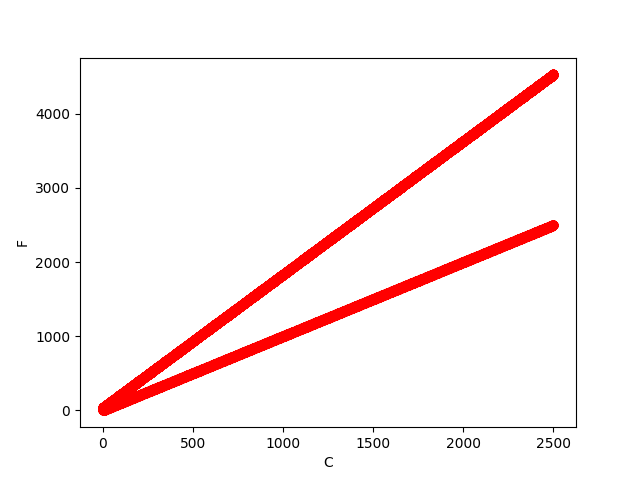

In [143]:
plt.plot(celsius_farenheit_input, celsius_farenheit_output, "ro")
plt.xlabel("C")
plt.ylabel("F")
plt.show()

## Creating the Perceptron

Here we create a perceptron with two inputs, one input will be the width of the fish while the other input will always be 1.0 and will serve as the bias term of our perceptron. The bias is needed when input of 0 doesn't match up with an output of 0, even if it does, leaving it in doesn't hurt.

The initial weights are random values between 0.0 and 1.0.

In [144]:
perceptron = Perceptron(2, 0.001)
perceptron.weights

array([0.84056718, 0.604128  ])

## Train the Perceptron

Here we train the perceptron with the data that we have. We pass in each piece of data that we have one at a time into the perceptron and adjust the weights according to the error and the learning rate.

You can see how the perceptron is trying to fit a line through our dataset over time.

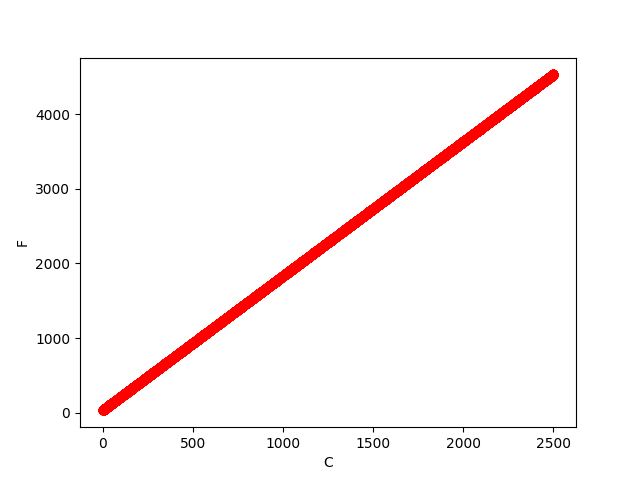

In [152]:
fig, ax = plt.subplots()
epochs = celsius_farenheit_input.shape[0]

plt.xlabel("C")
plt.ylabel("F")
plt.plot(celsius_farenheit_input, celsius_farenheit_output, "ro")
ln, = plt.plot([], [], "-b")
txt = plt.text(0, 1800, "")

def animate(frame_num):
    perceptron.train([celsius_farenheit_input[frame_num], 1.0], celsius_farenheit_output[frame_num])
    
    x = np.linspace(0, 1500, 50)
    y = perceptron.get_weights()[0] * x + perceptron.get_weights()[1]
    ln.set_data(x, y)
    
    
anim = animation.FuncAnimation(fig, animate, frames=epochs, interval=20)
plt.show()

## Prediction

Now we can use out perceptron to make prediction about the weight of a fish given just the width of it, even if its width was not in the original dataset.

In [148]:
perceptron.feed_forward([10.0, 1.0])

1.5464419003946854

# Multiple Inputs Perceptron

We will use the full set of data available, Length1, Length2, Length3, Height, Width, to train a perceptron that can predict the Weight of a fish with possibly more precision.

In [149]:
perceptron = Perceptron(2, 0.001)
perceptron.weights

array([0.86517789, 0.1667644 ])

In [150]:
shuffled_data = np.copy(data)
np.random.shuffle(shuffled_data)
input_data = shuffled_data[:, 1:]
output_data = shuffled_data[:, 0]

epochs = 1000

for _ in range(epochs):
    for i, x in enumerate(input_data):
        perceptron.train(np.append(x, 1.0), output_data[i])
      
errors = np.array([])
for _ in range(100):
    sample_index = random.randrange(0, len(input_data))
    errors = np.append(errors, perceptron.evaluate(np.append(input_data[sample_index], 1.0), output_data[sample_index]))
    
np.average(errors)

C:\Users\mccal\AppData\Local\Temp\ipykernel_10452\1802018661.py:22: RuntimeWarning: overflow encountered in scalar multiply
  total = sum([weight * inputs[i] for i, weight in enumerate(self.weights)])
C:\Users\mccal\AppData\Local\Temp\ipykernel_10452\1802018661.py:16: RuntimeWarning: invalid value encountered in scalar add
  self.weights = [weight + (self.lr * error * inputs[i]) for i, weight in enumerate(self.weights)]


nan

# Perceptron Classifier

We can also use the perceptron as a classifier. For this example, we will use the width and height of the fish to determine if it is a bream or a perch. We will set bream to be represented by "1" and perch to be represented by "-1".

In [ ]:
classification_data = np.array([row for row in raw_data if row[0] == "Bream" or row[0] == "Perch"])
classification_data[:, 0] = np.array(["1.0" if name == "Bream" else "-1.0" for name in classification_data[:, 0]])
classification_data[:10]

Split data into input and output as we have done before. We then graph the data, the red points are breams while the blue points are perch.

In [ ]:
classification_output = np.array(classification_data[:, 0], dtype=float)
classification_input = np.array(classification_data[:, -2:], dtype=float)

plt.xlabel("Height(cm)")
plt.ylabel("Width(cm)")

bream_x, bream_y = [], []
perch_x, perch_y = [], []
for i, val in enumerate(classification_output):
    if val == 1:
        bream_x.append(classification_input[i][0])
        bream_y.append(classification_input[i][1])
    elif val == -1:
        perch_x.append(classification_input[i][0])
        perch_y.append(classification_input[i][1])
pts_bream = plt.plot(bream_x, bream_y, "rx")
pts_perch = plt.plot(perch_x, perch_y, "bx")
plt.show()

In [ ]:
print(classification_input.shape)
print(classification_output.shape)

Time to setup and train the perceptron

In [ ]:
perceptron = Perceptron(3, 0.0001, True)
perceptron.weights

In [ ]:
fig, ax = plt.subplots()
plt.xlabel("Height(cm)")
plt.ylabel("Width(cm)")

bream_x, bream_y = [], []
perch_x, perch_y = [], []
for i, val in enumerate(classification_output):
    if val == 1:
        bream_x.append(classification_input[i][0])
        bream_y.append(classification_input[i][1])
    elif val == -1:
        perch_x.append(classification_input[i][0])
        perch_y.append(classification_input[i][1])
pts_bream = plt.plot(bream_x, bream_y, "rx")
pts_perch = plt.plot(perch_x, perch_y, "bx")

ln, = plt.plot([], [], '-')

def animate(frame_num):
    for i, value in enumerate(classification_input):
        perceptron.train(np.append(value, 1.0), classification_output[i])

    # Draw the line based on the current weights
    # Formula is weights[0]*x + weights[1]*y + weights[2] = 0
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = (-perceptron.weights[2] - perceptron.weights[0] * x_vals) / perceptron.weights[1];
    
    ln.set_data(x_vals, y_vals)

epochs = 100
anim = animation.FuncAnimation(fig, animate, frames=epochs, interval=20)
plt.show()
    

In [ ]:
print(perceptron.feed_forward([12, 3, 1.0]))
print(perceptron.weights)